# Install & Import Library

In [ ]:
!pip install pythainlp 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 73.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pythainlp
import re
import nltk

from datetime import date
from tqdm import tqdm, tqdm_pandas

tqdm.pandas() # Calling progress over pandas operation

# Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('honestdoc.xlsx', index_col ="ID")
data.head(10)

,score,date,comment
ID,,,
1,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...
2,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...
3,5,2019-01-17,รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญ...
4,1,2021-01-15,มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยร...
5,1,2019-07-31,ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม ห...
6,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...
7,3,2018-12-27,ที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย ...
8,5,2018-12-23,เพื่อนของดิฉันเป็นโรคเกี่ยวกับปอด ปอดรั่ว หมอท...
9,5,2018-12-21,วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพยา...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   score    50 non-null     int64         
 1   date     50 non-null     datetime64[ns]
 2   comment  50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#Data Exploration

In [ ]:
pd.crosstab(data.comment, columns ='Count').sort_values(by = 'Count', ascending =False)

col_0,Count
comment,
เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ไม่ถึง5นาทีการรักษา ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ค่ารักรักษาพยนบาลไม่แพงด้วย,2
การบริการของหมอและพยาบาลดีมาก. แต่ควรปรับปรุงคือเรื่องเวลา. รอตรวจนานมาก. รอรับยานานมากเช่นกันค่ะ,1
รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่,1
วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพยาบาลรามาฯ แผนกหูคอจมูกแบบพรีเมียม สถานที่สะอาดกว้างขวางดี บริการดีมาก ไม่ต้องรอนาน อาจาย์หมอเป็นผู้ตรวจเอง พูดจาดีน่ารักจริงๆ และส่งต่อไปห้องตรวจการนอนหลับก็ได้คิวในวันต่อมาเลยทีเดียว อาทิตย์ต่อมาฟังผลและวางแผนการรักษา โดยให้ลดน้ำหนักพร้อมส่งตัวไปนัดที่แผนกโภชนาการ ซึ่งคิวก็ไม่นานมาก รวดเร็วไม่เสียเวลามาก,1
ศูนย์การแพทย์สมเด็จพระเทพรัตน์ รพ.รามาธิบดี คุณหมอและพยาบาลหน้าห้อง น่ารักมากๆ ทักทายยิ้มแย้มแจ่มใส คุณหมอ ใส่ใจแนะนำการดูแลคุณแม่และลูกในครรภ์ดีมากๆ อย่างละเอียด ประทับใจมากๆ ค่ะ,1
หนวยสิทธิประโยชน์ผู้รับบริการ ชั้น1 ตรงประตูทางเข้า แยกตึกชัย ควรที่จะปรับปรุง เรื้องบัตรคิว นะครับ อย่าก จะแนะนำ ให้ นำบัตรคิว มาวางก่อน ได้มัย ผู้รับบริการจะได้ ไม่ต้องไปต่อแถวรอครับ บางคน ก็แทรกแถว บางคนก็แซงคิว อย่ากให้เห็นใจคนที่เจารอ อะคับ บางทีบัตรคิว ก็เปลียนตำแหนงวาง บอกเลย แย่มาก . บอกเลยเป็นอย่างนีมาหลายปีละ ผมมาก่อน ตี4 ทึกครั้งเห็นทุกครั้ง ครับ แค่อย่ากแนะนำ,1
อุปกรณ์เครื่องมือแพทย์ทันสมัย แพทย์ พยาบาล ทำการรักษาด้วยความตั้งใจ การบริการดีเยี่ยม,1
เคยไปผ่าตัดที่โรงพยาบาลนี้เขารักษาดูแลดีมากทั้งหมอสถาบันประสาทและรพ.นี้ช่วยกันดูแลหนูเป็นอย่างดีเลยตอนผ่าตัดมาผ่าที่รามาตอนรักษารักษาที่สถาบันประสาทมันอยู่ติดกันและตอนนี้ก็ไม่มีอาการแล้วหายแล้วแม่ก็ไปผ่าต้อที่รามาหมอฝีมือดีมากค่ะที่นี้เพื่อนก็มีโรคประจำตัวเขาเป็นไรไม่รู้แต่กินเท่าไหล่ก็ไม่อ้วนมีแต่กระตูกก็มาที่รามาหมอก็ให้คำปรึกษาอย่างดีเขาก็ดีขึ้นหุ่นเริ่มมีน้ำมีนวลขึ้นไม่เห็นกระดูกเหมือนเมื่อก่อนแล้วที่นี้ดีไม่มีคำว่าเลี้ยงไข้เคยไปมารพ.นึงก่อนจะมารักษาที่สถาบันประสาทและได้มาผ่าตัดที่นี้โดนเลี้ยงไข้มา3ปี,1
เป็น รพ รัฐที่มีระบบบริหารจัดการที่ดี โดยเฉพาะศูนย์การแพทย์สมเด็จพระเทพฯ,1


In [ ]:
data.drop_duplicates(subset=['score', 'date','comment'], inplace =True )
data.head(10)

,score,date,comment
ID,,,
1,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...
2,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...
3,5,2019-01-17,รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญ...
4,1,2021-01-15,มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยร...
5,1,2019-07-31,ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม ห...
7,3,2018-12-27,ที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย ...
8,5,2018-12-23,เพื่อนของดิฉันเป็นโรคเกี่ยวกับปอด ปอดรั่ว หมอท...
9,5,2018-12-21,วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพยา...
10,5,2018-12-03,แนะนำโรงพยาบาลรามาธิบดี เคยผ่าตัดส่องกล้องช็อค...


In [ ]:
len(data)

49

In [ ]:
data['score'].value_counts()

5    28
4    13
1     4
3     2
2     2
Name: score, dtype: int64

<Axes: title={'center': 'Rating Score'}, xlabel='Score', ylabel='Counts'>

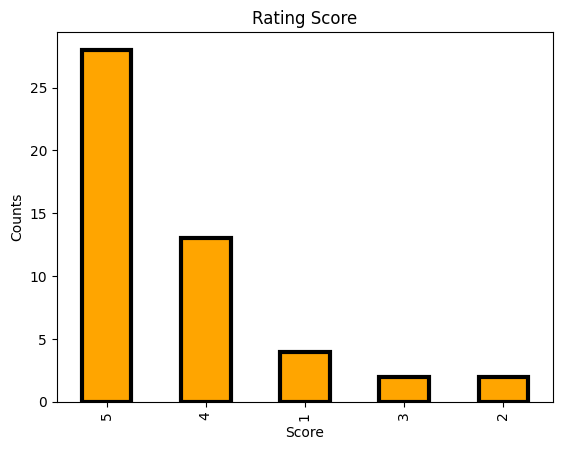

In [ ]:
data['score'].value_counts().plot.bar(title= "Rating Score",xlabel='Score', ylabel = 'Counts', color='orange', ec='black', lw=3 )

In [ ]:
data["date"].value_counts()

2017-02-05    6
2017-02-01    5
2017-02-04    4
2017-02-07    3
2017-01-18    2
2017-01-19    2
2017-02-03    2
2017-02-06    2
2017-02-08    2
2017-02-09    2
2017-02-10    2
2019-02-08    1
2017-02-02    1
2018-09-03    1
2019-07-29    1
2018-10-10    1
2018-10-11    1
2018-10-12    1
2018-10-19    1
2018-11-08    1
2018-12-03    1
2018-12-21    1
2018-12-23    1
2018-12-27    1
2019-07-31    1
2021-01-15    1
2019-01-17    1
2018-09-20    1
Name: date, dtype: int64

<Axes: xlabel='score', ylabel='date'>

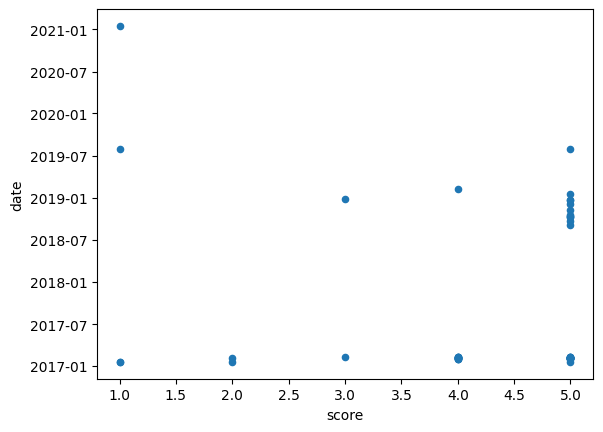

In [ ]:
data.plot.scatter('score',"date")

# Preprocessing

### Text cleaning

In [ ]:
data['comment'].values

array(['เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ไม่ถึง5นาทีการรักษา ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ค่ารักรักษาพยนบาลไม่แพงด้วย',
       'ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่า',
       'รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่',
       'มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยรู้เรื่องอะไรแทนที่จะบอกดีๆพูดอย่างกับอะไรนี่คนไข้นะคะไม่ใช่ทาส ละเวลาบอกจุดนะคะควรบอกให้ชัดเจนและเข้า

In [ ]:
data["comment1"]= data["comment"].progress_apply(lambda x: x.replace("\n ", " "))

100%|██████████| 49/49 [00:00<00:00, 80375.79it/s]


In [ ]:
import string

In [ ]:
s = "อีก็อตซิลล่า!!!  (คิดว่าไม่ใช่พยาบาลเพราะใส่ชุดสีม่วง) "
s.translate(str.maketrans("", "", string.punctuation))

'อีก็อตซิลล่า  คิดว่าไม่ใช่พยาบาลเพราะใส่ชุดสีม่วง '

In [ ]:
data["comment1"] = data["comment"].progress_apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

100%|██████████| 49/49 [00:00<00:00, 9719.60it/s]


In [ ]:
print("Before token removal: {}".format(data.loc[5, "comment"]))  
print("After token removal: {}".format(data.loc[5, "comment1"]))

print("Before token removal: {}".format(data.loc[7, "comment"]))  
print("After token removal: {}".format(data.loc[7, "comment1"]))

Before token removal: ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม หมอรักษาดี สุภาพ แต่ให้คำแนะนำน้อยไปหน่อย ไม่รู้ว่าอาจารย์แพทย์อาจจะเหนื่อยกับการอธิบายมาหลายร้อยหลายพันเคสมาแล้วก็ได้ คนไข้กับญาติอยากได้ข้อมูลเกี่ยวกับโรค ยา และผลข้างเคียงเยอะๆ เพราะเราต่างก็กลัว และไม่เคยเป็น ไม่เหมือนหมอที่คงชินกับการรักษาอาการแบบเดิมๆ แต่ก็เชื่อมั่นในตัวหมอนะคะ แต่ที่แย่มากกกก คือพยาบาลในห้องบำบัดระยะสั้น พูดจาแย่ แข็ง กระด้าง ถามไปก็ตอบแบบย้อนกลับมา เราถามก็หาว่าพูดแทรก ถ้าเหนื่อย คุณลาออกไปนอนอยู่บ้านเถอะ อย่ามาเป็นพยาบาลเลย เรียนมาแต่วิชาชีพแต่ไม่มีใครสอนเรื่องมารยาทหรือไง ทั้งกิริยา คำพูด ไม่มีความเมตตาในน้ำเสียงเลย อีก็อตซิลล่า!!! น่าโมโหมาก นี่ขนาดพรีเมี่ยม !! น่าจะคัดพยาบาลที่มีวุฒิภาวะดีกว่านี้หน่อย อีกนิดเดียวโดนตบแน่
After token removal: ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม หมอรักษาดี สุภาพ แต่ให้คำแนะนำน้อยไปหน่อย ไม่รู้ว่าอาจารย์แพทย์อาจจะเหนื่อยกับการอธิบายมาหลายร้อยหลายพันเคสมาแล้วก็ได้ คนไข้กับญาติอยากได้ข้อมูลเกี่ยวกับโรค ยา และผลข้างเคียงเยอะๆ เพราะเราต่างก็กลัว และไม่เคยเ

In [ ]:
data['comment1'].values

array(['เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ไม่ถึง5นาทีการรักษา ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ค่ารักรักษาพยนบาลไม่แพงด้วย',
       'ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่า',
       'รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่',
       'มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยรู้เรื่องอะไรแทนที่จะบอกดีๆพูดอย่างกับอะไรนี่คนไข้นะคะไม่ใช่ทาส ละเวลาบอกจุดนะคะควรบอกให้ชัดเจนและเข้า

In [ ]:
data.head(10)

,score,date,comment,comment1
ID,,,,
1,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...
2,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...
3,5,2019-01-17,รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญ...,รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญ...
4,1,2021-01-15,มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยร...,มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยร...
5,1,2019-07-31,ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม ห...,ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม ห...
7,3,2018-12-27,ที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย ...,ที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย ...
8,5,2018-12-23,เพื่อนของดิฉันเป็นโรคเกี่ยวกับปอด ปอดรั่ว หมอท...,เพื่อนของดิฉันเป็นโรคเกี่ยวกับปอด ปอดรั่ว หมอท...
9,5,2018-12-21,วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพยา...,วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพยา...
10,5,2018-12-03,แนะนำโรงพยาบาลรามาธิบดี เคยผ่าตัดส่องกล้องช็อค...,แนะนำโรงพยาบาลรามาธิบดี เคยผ่าตัดส่องกล้องช็อค...


### Tokenization 


In [ ]:
!pip install python-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 21.2 MB/s eta 0:00:00


In [ ]:
!pip install sefr_cut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.6 MB/s eta 0:00:00


In [ ]:
from pythainlp import sent_tokenize, word_tokenize, Tokenizer, correct, spell  
from pythainlp.util import normalize, countthai  
from pythainlp.spell import NorvigSpellChecker
from pythainlp.corpus.common import thai_stopwords
from pythainlp.corpus import ttc  

In [ ]:
comment1_text = ''
for t in data['comment1']:
 comment1_text += t
comment1_text

'เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ไม่ถึง5นาทีการรักษา ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ค่ารักรักษาพยนบาลไม่แพงด้วยผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่ารักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยรู้เรื่องอะไรแทนที่จะบอกดีๆพูดอย่างกับอะไรนี่คนไข้นะคะไม่ใช่ทาส ละเวลาบอกจุดนะคะควรบอกให้ชัดเจนและเข้าใจด้วยค่ะ เพราะบางทีก็ไม่รู้พอจะถามก็บอก

In [ ]:
data["countthai"] = data["comment1"].apply(lambda x: countthai(x))
print("Number of rows before remove non-Thai sentences is {}".format(len(data.index)))

data = data[data["countthai"] > 0].reset_index(drop=True)
print("Number of rows after remove non-Thai sentences is {}".format(len(data.index)))

Number of rows before remove non-Thai sentences is 49
Number of rows after remove non-Thai sentences is 49


In [ ]:
data["comment1"] = data["comment1"].progress_apply(lambda x: sent_tokenize(x))
data1 = data.explode("comment1").reset_index(drop=True)

100%|██████████| 49/49 [00:00<00:00, 389.67it/s]


In [ ]:
print("Number of rows in the original dataframe is {} rows.".format(str(len(data.index))))
print("Number of rows in the exploded dataframe is {} rows.".format(str(len(data1.index))))

Number of rows in the original dataframe is 49 rows.
Number of rows in the exploded dataframe is 273 rows.


In [ ]:
data1.head(20)

,score,date,comment,comment1,countthai
0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,100.0
1,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,100.0
2,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,100.0
3,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,ไม่ถึง5นาทีการรักษา,100.0
4,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,100.0
5,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,ค่ารักรักษาพยนบาลไม่แพงด้วย,100.0
6,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...,ผมเคยไปทำเลสิกที่นี้,100.0
7,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...,ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคี...,100.0
8,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...,ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย,100.0
9,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...,แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ,100.0


In [ ]:
from pythainlp.corpus.common import thai_stopwords

In [ ]:
thai_stopwords = list(thai_stopwords())

###Check Spell and Save

In [ ]:
sample_corpus = data.comment1[0]
sample_corpus

['เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง ',
 'รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ ',
 'การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ',
 'ไม่ถึง5นาทีการรักษา ',
 'ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ',
 'ค่ารักรักษาพยนบาลไม่แพงด้วย']

In [ ]:
def get_tokens(corpus, sep):
  words = []
  for s in corpus:
    tokens = word_tokenize(normalize(s))
    tokens = [correct(token) for token in tokens]
    words.append(sep.join(tokens))
  return words

In [ ]:
sample_tokens = get_tokens(sample_corpus, sep="|")
sample_tokens

['เคย|ได้|ไป|ลอง|ใช้|บริการ|คลินิก|นอกเวลา|ของ|รามา|เมื่อ|ต้น|ที่แล้ว|ใน|ได้|เข้า|รักษา|เลเซอร์|บน|ใน|หน้า|ใน|พยาบาล|กับ|คุณหมอ|ใจ|มาก|ๆๆ|ใน|เป็นกันเอง|ใน|ดูแล|อย่าง|ทั่วถึง',
 'รอ|คิว|ไม่|นาน|เลย|ใน|แต่|ต้อง|โทร|ไป|จอง|ล่วงหน้า|ก่อน|น่ะ|ค่ะ',
 'การ|รัก|ศึกษา|ของ|คุณหมอ|ไม่|เจ็บ|เลย|ค่ะ',
 'ไม่|ถึง|5|นาที|การศึกษา',
 'ผล|ลัพ|ที่|ออกญา|รอย|ใบ|บน|หน้า|หาย|หมด|เลย|ค่ะ',
 'ค่า|รัก|รักษา|พัน|บาล|ไม่|แพง|ด้วย']

In [ ]:
def cleantext(message, sep):
  
  tokens = word_tokenize(normalize(message.replace(" ", "")), engine="newmm")
  tokens = [correct(token) for token in tokens]
  text = "".join(tokens)
  return text

In [ ]:
sample_text = cleantext(sample_corpus[0], sep="|")
sample_text

'เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต้นที่แล้วได้เข้ารักษาเลเซอร์บนในหน้าพยาบาลกับคุณหมอใจมากๆๆเป็นกันเองดูแลอย่างทั่วถึง'

In [ ]:
def cleantext_minibatch(data2, batch_size, filename, count=0, test=True):
  start = 0 + count
  upper = len(data2.index)
  if test:
      nbatch = 3
  else:
      nbatch = int(np.ceil(upper / batch_size))
  out = pd.DataFrame()
  for i in range(start, nbatch):
      if (i * batch_size) + batch_size > upper:
          end = upper
      else:
          end = (i * batch_size) + batch_size
      idx = list(range(i * batch_size, end))
      temp = data2.loc[idx, :]
      temp["clean"] = temp["comment1"].progress_apply(lambda x: cleantext(x, "|"))
      out = pd.concat([out, temp], axis=0, ignore_index=True, sort=False)
      temp.to_csv(filename + str(count) + ".csv", index=False, sep="|", encoding="utf8")
      count += 1
  return out

In [ ]:
data

,score,date,comment,comment1,countthai
0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,[เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อ...,100.0
1,4,2019-02-08,ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปี...,"[ผมเคยไปทำเลสิกที่นี้ , ดีมากครับตอนนี้ผ่ามาจะ...",100.0
2,5,2019-01-17,รักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญ...,"[รักษามาหลายปีแล้วตั้งแต่อายุ14 , ตอนนี้จะจบปร...",100.0
3,1,2021-01-15,มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อยร...,[มาวันนี้พยาบาลบางคนพูดแย่มากค่ะ ย่าเราไม่ค่อย...,100.0
4,1,2019-07-31,ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม ห...,[ดิฉันพาพี่สาวมารักษามะเร็งลำไส้แผนกพรีเมี่ยม ...,100.0
5,3,2018-12-27,ที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย ...,[ที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย...,100.0
6,5,2018-12-23,เพื่อนของดิฉันเป็นโรคเกี่ยวกับปอด ปอดรั่ว หมอท...,"[เพื่อนของดิฉันเป็นโรคเกี่ยวกับปอด ปอดรั่ว , ห...",100.0
7,5,2018-12-21,วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพยา...,[วันนั้นไปตรวจเนื่องจากปัญหาการนอนกรน ที่โรงพย...,100.0
8,5,2018-12-03,แนะนำโรงพยาบาลรามาธิบดี เคยผ่าตัดส่องกล้องช็อค...,[แนะนำโรงพยาบาลรามาธิบดี เคยผ่าตัดส่องกล้องช็อ...,100.0
9,5,2018-11-08,พาย่ามารักษาโรคไต โรงพยาบาลให้การต้อนรับดีมาก ...,[พาย่ามารักษาโรคไต โรงพยาบาลให้การต้อนรับดีมาก...,100.0


In [ ]:
data1

,score,date,comment,comment1,countthai
0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,100.0
1,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,100.0
2,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,100.0
3,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,ไม่ถึง5นาทีการรักษา,100.0
4,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,100.0
...,...,...,...,...,...
268,5,2017-01-18,คุณป้าป่วยหนักเข้ารับการรักษาที่โรงพยาบาลรามา ...,ขอบคุณมากนะคะ,100.0
269,1,2017-01-18,แผนกฉุกเฉิน วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อ...,แผนกฉุกเฉิน,100.0
270,1,2017-01-18,แผนกฉุกเฉิน วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อ...,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,100.0
271,1,2017-01-18,แผนกฉุกเฉิน วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อ...,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,100.0


In [ ]:
data2 = data1.drop(columns = {"comment","countthai"})
data2

,score,date,comment1
0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...
1,5,2019-07-29,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,5,2019-07-29,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ
3,5,2019-07-29,ไม่ถึง5นาทีการรักษา
4,5,2019-07-29,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ
...,...,...,...
268,5,2017-01-18,ขอบคุณมากนะคะ
269,1,2017-01-18,แผนกฉุกเฉิน
270,1,2017-01-18,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...
271,1,2017-01-18,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...


In [ ]:
data2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   score     273 non-null    int64         
 1   date      273 non-null    datetime64[ns]
 2   comment1  273 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.5+ KB


In [ ]:
data3 = cleantext_minibatch(data2, 273, "data3_cleaned", count=0, test=True) 

100%|██████████| 273/273 [06:29<00:00,  1.43s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [ ]:
data3 

,score,date,comment1,clean
0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,5,2019-07-29,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,5,2019-07-29,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
3,5,2019-07-29,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
4,5,2019-07-29,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
...,...,...,...,...
268,5,2017-01-18,ขอบคุณมากนะคะ,ขอบคุณมากมะคะ
269,1,2017-01-18,แผนกฉุกเฉิน,แผนกฉุกเฉิน
270,1,2017-01-18,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,1,2017-01-18,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
data3['clean'].values

array(['เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต้นที่แล้วได้เข้ารักษาเลเซอร์บนในหน้าพยาบาลกับคุณหมอใจมากๆๆเป็นกันเองดูแลอย่างทั่วถึง',
       'รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ',
       'การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ', 'ไม่ถึง5นาทีการศึกษา',
       'ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ',
       'ค่ารักรักษาพันบาลไม่แพงด้วย', 'ผมเคยไปทำเลิกที่นี้',
       'มากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีลค้างเคียงอะไรและราคาก็ถูกดีด้วย',
       'ตอนผ่าอาจดูน่ากลัวไปซะหน่อย',
       'แต่พอถึงเวลาผ่าจริงแล้วไม่รู้สึกเจ็บเลยครับ',
       'เพราะมีการหยอดราชาก่อนผ่า', 'รักษามาหลายปีแล้วตั้งแต่อายุ14',
       'ตอนนี้จะจบปริญญาตรีแล้ว',
       'ตั้งแต่นอนแอดมิดที่รพจนหายดีออกญาใช้ชีวิตได้เป็นปกติ',
       'โดยเฉพาะคลินิกพรีเมียม', 'มะต้องรอนาน',
       'มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา',
       'ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆๆที่บริการมากๆๆคุณหมอดูแลเอาใจใส่ดี',
       'อยากให้ทุกหนมารักษาที่นั่ง',
       'มาวันนี้พยาบาลบางคำพูดแย่มากค่ะย่าเ

In [ ]:
data3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   score     273 non-null    int64         
 1   date      273 non-null    datetime64[ns]
 2   comment1  273 non-null    object        
 3   clean     273 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.7+ KB


In [ ]:
data3.to_csv

<bound method NDFrame.to_csv of      score       date                                           comment1  \
0        5 2019-07-29  เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...   
1        5 2019-07-29  รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ    
2        5 2019-07-29                 การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ    
3        5 2019-07-29                               ไม่ถึง5นาทีการรักษา    
4        5 2019-07-29              ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ    
..     ...        ...                                                ...   
268      5 2017-01-18                                      ขอบคุณมากนะคะ   
269      1 2017-01-18                                       แผนกฉุกเฉิน    
270      1 2017-01-18  วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...   
271      1 2017-01-18  เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...   
272      1 2017-01-18            ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดส้นเท้าทิ้ง   

                                                 clean 

In [ ]:
data3.to_csv("data3_cleaned.csv", sep="|", encoding="utf8") 

# Analyze  
การเรียกใช้งาน API ของ AI for Thai จาก NECTEC คือ sentiment analysis (SSense) สามารถดูรายละเอียดได้ที่ https://aiforthai.in.th/  

In [ ]:
data = pd.read_csv("data3_cleaned.csv", sep="|", encoding="utf-8" )

In [ ]:
data

,Unnamed: 0,score,date,comment1,clean
0,0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,5,2019-07-29,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,5,2019-07-29,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
3,3,5,2019-07-29,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
4,4,5,2019-07-29,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
...,...,...,...,...,...
268,268,5,2017-01-18,ขอบคุณมากนะคะ,ขอบคุณมากมะคะ
269,269,1,2017-01-18,แผนกฉุกเฉิน,แผนกฉุกเฉิน
270,270,1,2017-01-18,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,271,1,2017-01-18,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
data.rename(columns={"Unnamed: 0" : "subindex"}, inplace=True)
data

,subindex,score,date,comment1,clean
0,0,5,2019-07-29,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,5,2019-07-29,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,5,2019-07-29,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
3,3,5,2019-07-29,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
4,4,5,2019-07-29,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
...,...,...,...,...,...
268,268,5,2017-01-18,ขอบคุณมากนะคะ,ขอบคุณมากมะคะ
269,269,1,2017-01-18,แผนกฉุกเฉิน,แผนกฉุกเฉิน
270,270,1,2017-01-18,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,271,1,2017-01-18,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subindex  273 non-null    int64 
 1   score     273 non-null    int64 
 2   date      273 non-null    object
 3   comment1  273 non-null    object
 4   clean     273 non-null    object
dtypes: int64(2), object(3)
memory usage: 10.8+ KB


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['date']

0     2019-07-29
1     2019-07-29
2     2019-07-29
3     2019-07-29
4     2019-07-29
         ...    
268   2017-01-18
269   2017-01-18
270   2017-01-18
271   2017-01-18
272   2017-01-18
Name: date, Length: 273, dtype: datetime64[ns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   subindex  273 non-null    int64         
 1   score     273 non-null    int64         
 2   date      273 non-null    datetime64[ns]
 3   comment1  273 non-null    object        
 4   clean     273 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 10.8+ KB


In [ ]:
import requests
import json

In [ ]:
url = "https://api.aiforthai.in.th/ssense"
 
text = data.clean[0]

api_key = "private api key from aiforthai" 
 
params = {'text':text}
 
headers = {'Apikey': "private api key from aiforthai",
           "Content-Type": "application/x-www-form-urlencoded"}
 
response = requests.get(url, headers=headers, params=params)
 
print(response.json())

{'sentiment': {'score': '80', 'polarity-neg': False, 'polarity-pos': True, 'polarity': 'positive'}, 'preprocess': {'input': 'เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต้นที่แล้วได้เข้ารักษาเลเซอร์บนในหน้าพยาบาลกับคุณหมอใจมากๆๆเป็นกันเองดูแลอย่างทั่วถึง', 'neg': [], 'pos': ['เป็นกันเอง', 'ดูแล'], 'segmented': ['เคย', 'ได้', 'ไป', 'ลอง', 'ใช้', 'บริการ', 'คลินิก', 'นอกเวลา', 'ของ', 'รามา', 'เมื่อ', 'ต้น', 'ที่แล้ว', 'ได้', 'เข้า', 'รักษา', 'เลเซอร์', 'บน', 'ใน', 'หน้า', 'พยาบาล', 'กับ', 'คุณหมอ', 'ใจ', 'มากๆ', 'เป็นกันเอง', 'ดูแล', 'อย่าง', 'ทั่วถึง'], 'keyword': ['ลอง', 'ใช้', 'บริการ', 'คลินิก', 'นอกเวลา', 'รามา', 'ต้น', 'ที่แล้ว', 'รักษา', 'เลเซอร์', 'บน', 'หน้า', 'พยาบาล', 'คุณหมอ', 'ใจ', 'มากๆ', 'ทั่วถึง']}, 'alert': [], 'comparative': [], 'associative': [], 'intention': {'request': '0', 'sentiment': '80', 'question': '0', 'announcement': '0'}}


In [ ]:
response.json()

{'sentiment': {'score': '80',
  'polarity-neg': False,
  'polarity-pos': True,
  'polarity': 'positive'},
 'preprocess': {'input': 'เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต้นที่แล้วได้เข้ารักษาเลเซอร์บนในหน้าพยาบาลกับคุณหมอใจมากๆๆเป็นกันเองดูแลอย่างทั่วถึง',
  'neg': [],
  'pos': ['เป็นกันเอง', 'ดูแล'],
  'segmented': ['เคย',
   'ได้',
   'ไป',
   'ลอง',
   'ใช้',
   'บริการ',
   'คลินิก',
   'นอกเวลา',
   'ของ',
   'รามา',
   'เมื่อ',
   'ต้น',
   'ที่แล้ว',
   'ได้',
   'เข้า',
   'รักษา',
   'เลเซอร์',
   'บน',
   'ใน',
   'หน้า',
   'พยาบาล',
   'กับ',
   'คุณหมอ',
   'ใจ',
   'มากๆ',
   'เป็นกันเอง',
   'ดูแล',
   'อย่าง',
   'ทั่วถึง'],
  'keyword': ['ลอง',
   'ใช้',
   'บริการ',
   'คลินิก',
   'นอกเวลา',
   'รามา',
   'ต้น',
   'ที่แล้ว',
   'รักษา',
   'เลเซอร์',
   'บน',
   'หน้า',
   'พยาบาล',
   'คุณหมอ',
   'ใจ',
   'มากๆ',
   'ทั่วถึง']},
 'alert': [],
 'comparative': [],
 'associative': [],
 'intention': {'request': '0',
  'sentiment': '80',
  'question': '0',
  'a

In [ ]:
intent = max(response.json()["intention"], key=response.json()["intention"].get)
intent

'sentiment'

In [ ]:
sentipolar = response.json()["sentiment"]["polarity"]
sentipolar

'positive'

In [ ]:
keyword = response.json()["preprocess"][sentipolar[0:3]]
keyword

['เป็นกันเอง', 'ดูแล']

In [ ]:
import time

In [ ]:
def calling_api(data):
    url = "https://api.aiforthai.in.th/ssense"
    api_key = "private api key from aiforthai" 
    headers = {"Apikey": api_key,
               "Content-Type": "application/x-www-form-urlencoded"}
    intents = []
    sentipolars = []
    keywords = []
    subindex = data["subindex"].tolist     
    score = data["score"].tolist()
    datetime = data["date"].tolist()
    comment1 = data["comment1"].tolist()
    clean = data["clean"].tolist()         
    
    for text in tqdm(data["clean"], total=len(data.index)):
        params = {"text": text}
        response = requests.get(url, params=params, headers=headers)
        intent = max(response.json()["intention"], key=response.json()["intention"].get)
        sentipolar = response.json()["sentiment"]["polarity"]

        if sentipolar == "":
            keyword = response.json()["preprocess"]["keyword"]
        else:
            keyword = response.json()["preprocess"][sentipolar[0:3]]

        intents.append(intent)
        sentipolars.append(sentipolar)
        keywords.append(keyword)
        time.sleep(10)

    return intents, sentipolars, keywords , subindex, score, datetime, comment1, clean   

In [ ]:
def calling_api_minibatch(data, batch_size, filename, count=0, test=True):
    start = 0 + count
    upper = len(data.index)
    if test:
        nbatch = 3
    else:
        nbatch = int(np.ceil(upper / batch_size))
    out = pd.DataFrame()
    for i in range(start, nbatch):
        if (i * batch_size) + batch_size > upper:
            end = upper
        else:
            end = (i * batch_size) + batch_size
        idx = list(range(i * batch_size, end))
        temp = data.loc[idx, :]
        intents, sentipolars, keywords , subindex, score, datetime, comment1,  clean = calling_api(temp)
        apires = pd.DataFrame({"intents": intents, 
                               "sentipolars": sentipolars, 
                               "keywords": keywords,
                               "subindex" : subindex,
                                "score" : score,
                                "datetime" : date,
                                "comment1" : comment1,           
                                "clean" : clean})         
        apires.to_csv(filename + str(count) + ".csv", index=False, sep="|", encoding="utf-8")
        out = pd.concat([out, apires], axis=0, ignore_index=True, sort=False)
        count += 1
    return out

In [ ]:
senti = calling_api_minibatch (data, 273, "senti_api_response", count=0, test=True)

In [ ]:
senti

,intents,sentipolars,keywords,subindex,score,datetime,comment1,clean
0,sentiment,positive,"[เป็นกันเอง, ดูแล]",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,sentiment,negative,[รอคิว],<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,sentiment,positive,"[รัก, ไม่เจ็บ]",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
3,request,,"[ไม่ถึง, นาที, การศึกษา]",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
4,sentiment,negative,"[รอย, หายหมด]",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
...,...,...,...,...,...,...,...,...
268,sentiment,positive,[ขอบคุณ],<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ขอบคุณมากนะคะ,ขอบคุณมากมะคะ
269,sentiment,negative,[ฉุกเฉิน],<bound method IndexOpsMixin.tolist of 0 ...,1.0,<class 'datetime.date'>,แผนกฉุกเฉิน,แผนกฉุกเฉิน
270,sentiment,negative,"[แผล, ห่วยแตก]",<bound method IndexOpsMixin.tolist of 0 ...,1.0,<class 'datetime.date'>,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,sentiment,negative,"[จน, แผล, อักเสบ, เน่า]",<bound method IndexOpsMixin.tolist of 0 ...,1.0,<class 'datetime.date'>,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   intents      273 non-null    object 
 1   sentipolars  273 non-null    object 
 2   keywords     273 non-null    object 
 3   subindex     273 non-null    object 
 4   score        273 non-null    float64
 5   datetime     273 non-null    object 
 6   comment1     273 non-null    object 
 7   clean        273 non-null    object 
dtypes: float64(1), object(7)
memory usage: 17.2+ KB


In [ ]:
senti.to_csv

<bound method NDFrame.to_csv of        intents sentipolars                          keywords  \
0    sentiment    positive                [เป็นกันเอง, ดูแล]   
1    sentiment    negative                           [รอคิว]   
2    sentiment    positive                    [รัก, ไม่เจ็บ]   
3      request                      [ไม่ถึง, นาที, การศึกษา]   
4    sentiment    negative                     [รอย, หายหมด]   
..         ...         ...                               ...   
268  sentiment    positive                          [ขอบคุณ]   
269  sentiment    negative                         [ฉุกเฉิน]   
270  sentiment    negative                    [แผล, ห่วยแตก]   
271  sentiment    negative           [จน, แผล, อักเสบ, เน่า]   
272    request              [ปล่อย, นัด, ตัด, ข้อเท้า, ทิ้ง]   

                                              subindex  score  \
0    <bound method IndexOpsMixin.tolist of 0       ...    5.0   
1    <bound method IndexOpsMixin.tolist of 0       ...    5.0   
2   

In [ ]:
senti.to_csv("senti_api_response.csv", sep="|", encoding="utf8") 

#Sentiment API Response

In [ ]:
!pip install wordcloud
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from datetime import date
from tqdm import tqdm, tqdm_pandas

tqdm.pandas() # Calling progress over pandas operation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("senti_api_response.csv", sep="|", encoding="utf-8")
data.head()

,Unnamed: 0,intents,sentipolars,keywords,subindex,score,datetime,comment1,clean
0,0,sentiment,positive,"['เป็นกันเอง', 'ดูแล']",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,sentiment,negative,['รอคิว'],<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,sentiment,positive,"['รัก', 'ไม่เจ็บ']",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
3,3,request,NaN,"['ไม่ถึง', 'นาที', 'การศึกษา']",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
4,4,sentiment,negative,"['รอย', 'หายหมด']",<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   273 non-null    int64  
 1   intents      273 non-null    object 
 2   sentipolars  169 non-null    object 
 3   keywords     273 non-null    object 
 4   subindex     273 non-null    object 
 5   score        273 non-null    float64
 6   datetime     273 non-null    object 
 7   comment1     273 non-null    object 
 8   clean        273 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 19.3+ KB


In [ ]:
data["keywords"] = data["keywords"].progress_apply(lambda x: x.replace("'", "").strip("][").split(","))

100%|██████████| 273/273 [00:00<00:00, 162533.00it/s]


In [ ]:
data = data.explode("keywords")
data.head(15)

,Unnamed: 0,intents,sentipolars,keywords,subindex,score,datetime,comment1,clean
0,0,sentiment,positive,เป็นกันเอง,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
0,0,sentiment,positive,ดูแล,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,sentiment,negative,รอคิว,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,sentiment,positive,รัก,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
2,2,sentiment,positive,ไม่เจ็บ,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
3,3,request,NaN,ไม่ถึง,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
3,3,request,NaN,นาที,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
3,3,request,NaN,การศึกษา,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ไม่ถึง5นาทีการรักษา,ไม่ถึง5นาทีการศึกษา
4,4,sentiment,negative,รอย,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
4,4,sentiment,negative,หายหมด,<bound method IndexOpsMixin.tolist of 0 ...,5.0,<class 'datetime.date'>,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ


In [ ]:
sentiword = data.drop(columns = {"subindex","datetime"},inplace=True)

In [ ]:
sentiword = data.rename(columns = {'Unnamed: 0': 'Index'})
sentiword

,Index,intents,sentipolars,keywords,score,comment1,clean
0,0,sentiment,positive,เป็นกันเอง,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
0,0,sentiment,positive,ดูแล,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,sentiment,negative,รอคิว,5.0,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,sentiment,positive,รัก,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
2,2,sentiment,positive,ไม่เจ็บ,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
...,...,...,...,...,...,...,...
272,272,request,NaN,ปล่อย,1.0,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดส้นเท้าทิ้ง,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดข้อเท้าทิ้ง
272,272,request,NaN,นัด,1.0,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดส้นเท้าทิ้ง,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดข้อเท้าทิ้ง
272,272,request,NaN,ตัด,1.0,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดส้นเท้าทิ้ง,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดข้อเท้าทิ้ง
272,272,request,NaN,ข้อเท้า,1.0,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดส้นเท้าทิ้ง,ถ้าปล่อยไว้ถึงวันนัดคงได้ตัดข้อเท้าทิ้ง


In [ ]:
sentiword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 272
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        701 non-null    int64  
 1   intents      701 non-null    object 
 2   sentipolars  250 non-null    object 
 3   keywords     701 non-null    object 
 4   score        701 non-null    float64
 5   comment1     701 non-null    object 
 6   clean        701 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 43.8+ KB


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.colors as color
import matplotlib.gridspec as gridspec
import matplotlib as mpl

from wordcloud import WordCloud  
from collections import Counter

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

--2023-05-18 13:14:42--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-05-18 13:14:42--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.007s  

2023-05-18 13:14:42 (12.9 MB/s) 

In [ ]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size = 20)

plt.rcParams['font.family'] = 'TH Sarabun New' 
plt.rcParams['font.size'] = 20

In [ ]:
sentiword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 272
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        701 non-null    int64  
 1   intents      701 non-null    object 
 2   sentipolars  250 non-null    object 
 3   keywords     701 non-null    object 
 4   score        701 non-null    float64
 5   comment1     701 non-null    object 
 6   clean        701 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 43.8+ KB


In [ ]:
#filter intents= sentiment
sentiword = sentiword[sentiword['intents'].str.contains("sentiment")]
sentiword

,Index,intents,sentipolars,keywords,score,comment1,clean
0,0,sentiment,positive,เป็นกันเอง,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
0,0,sentiment,positive,ดูแล,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,sentiment,negative,รอคิว,5.0,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,sentiment,positive,รัก,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
2,2,sentiment,positive,ไม่เจ็บ,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
...,...,...,...,...,...,...,...
270,270,sentiment,negative,ห่วยแตก,1.0,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,271,sentiment,negative,จน,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,แผล,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,อักเสบ,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
sentiword.sentipolars.value_counts()

positive    157
negative     85
Name: sentipolars, dtype: int64

In [ ]:
#Check Nan 
sentiword['sentipolars'].isnull().values.any()

True

In [ ]:
#Check Sum Nan
sentiword['sentipolars'].isnull().sum()

23

In [ ]:
#fiter Nan out of data
filtered_sentiword = sentiword[sentiword['sentipolars'].notnull()]
filtered_sentiword

,Index,intents,sentipolars,keywords,score,comment1,clean
0,0,sentiment,positive,เป็นกันเอง,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
0,0,sentiment,positive,ดูแล,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,sentiment,negative,รอคิว,5.0,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,sentiment,positive,รัก,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
2,2,sentiment,positive,ไม่เจ็บ,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
...,...,...,...,...,...,...,...
270,270,sentiment,negative,ห่วยแตก,1.0,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,271,sentiment,negative,จน,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,แผล,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,อักเสบ,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
#Check Sum Nan again
filtered_sentiword['sentipolars'].isnull().sum()

0

<Axes: title={'center': 'intents: sentiment'}, xlabel='sentipolars', ylabel='Counts'>

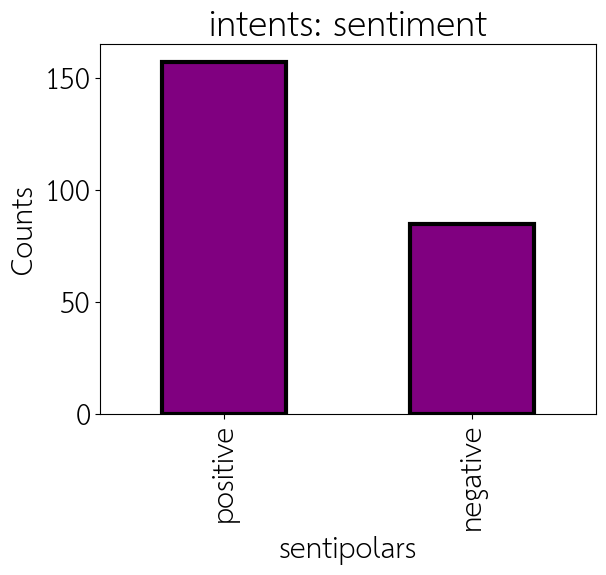

In [ ]:
#Plot bar chart compare intents: Sentiment between Positive and Negative
filtered_sentiword['sentipolars'].value_counts().plot.bar(title="intents: sentiment",xlabel='sentipolars', ylabel = 'Counts', color='purple', ec='black', lw=3)

In [ ]:
#Check Nan values
filtered_sentiword.sentipolars.values

array(['positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'positi

In [ ]:
filtered_sentiword

,Index,intents,sentipolars,keywords,score,comment1,clean
0,0,sentiment,positive,เป็นกันเอง,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
0,0,sentiment,positive,ดูแล,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
1,1,sentiment,negative,รอคิว,5.0,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
2,2,sentiment,positive,รัก,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
2,2,sentiment,positive,ไม่เจ็บ,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
...,...,...,...,...,...,...,...
270,270,sentiment,negative,ห่วยแตก,1.0,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,271,sentiment,negative,จน,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,แผล,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,อักเสบ,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


<Axes: title={'center': 'Count Score'}, xlabel='Score', ylabel='Counts'>

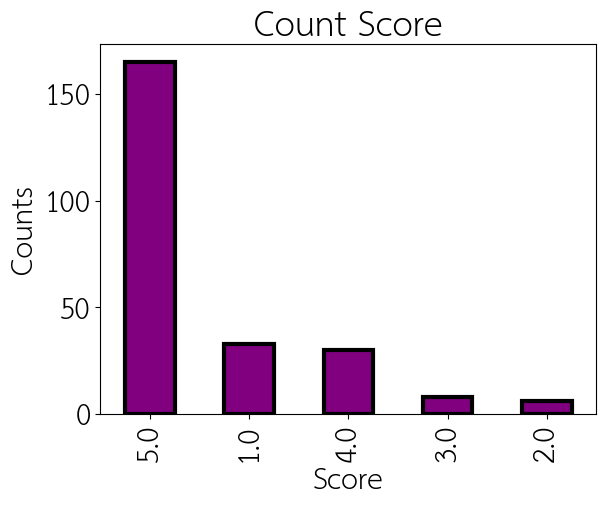

In [ ]:
#Count Score (sentiment)
filtered_sentiword['score'].value_counts().plot.bar(title="Count Score",xlabel='Score', ylabel = 'Counts', color='purple', ec='black', lw=3)

In [ ]:
filtered_sentiword['score'].value_counts()

5.0    165
1.0     33
4.0     30
3.0      8
2.0      6
Name: score, dtype: int64

In [ ]:
#filter sentipolars: negative
filtered_sentiword_neg = filtered_sentiword[filtered_sentiword['sentipolars'].str.contains("negative")]
filtered_sentiword_neg

,Index,intents,sentipolars,keywords,score,comment1,clean
1,1,sentiment,negative,รอคิว,5.0,รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ,รอคิวไม่นานเลยแต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ
4,4,sentiment,negative,รอย,5.0,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
4,4,sentiment,negative,หายหมด,5.0,ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ,ผลลัพที่ออกญารอยใบบนหน้าหายหมดเลยค่ะ
8,8,sentiment,negative,น่ากลัว,4.0,ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย,ตอนผ่าอาจดูน่ากลัวไปซะหน่อย
9,9,sentiment,negative,เจ็บ,4.0,แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ,แต่พอถึงเวลาผ่าจริงแล้วไม่รู้สึกเจ็บเลยครับ
...,...,...,...,...,...,...,...
270,270,sentiment,negative,ห่วยแตก,1.0,วันที่ 24 มิถุนายน 2559 เย็บแผลพ่อหนูได้ห่วยแต...,วันที่24มิถุนายน2559เย็บแผลพ่อนได้ห่วยแตกมากๆๆ
271,271,sentiment,negative,จน,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,แผล,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...
271,271,sentiment,negative,อักเสบ,1.0,เศษขยะเต็มส้นเท้าก็ไม่เอาออก จนแผลมีอาการอักเส...,เศษขยะเต็มข้อเท้าก็ไม่เอาออกจนแผลมีอาการอักเสบ...


In [ ]:
#filter keywords negative values: Negative 85 words
filtered_sentiword_neg['keywords'].values

array(['รอคิว', 'รอย', ' หายหมด', 'น่ากลัว', 'เจ็บ', 'จน', ' หาย',
       'รอนาน', 'แย่มาก', ' ไม่ค่อยรู้เรื่อง', 'เหนื่อย', 'ยากไร้',
       ' กลัว', 'แย่มาก', 'แย่', ' แข็งกระด้าง', 'เหนื่อย', 'ลาออก',
       'น่าโมโห', 'โดน', 'ดุ', ' เสียงแข็ง', 'แตก', 'รั่ว', 'จน', ' ไข้',
       'รอนาน', 'จืด', 'ไม่ห่วง', 'หาย', 'เสียชื่อ', 'มีความผิด',
       'ประสาท', ' ประสาท', ' หาย', ' ประสาท', ' โดน', 'จน', 'ไม่หาย',
       'มีเรื่อง', ' ฉุกเฉิน', 'รอนาน', ' อุบัติเหตุ',
       'ไม่ค่อยยิ้มแย้มแจ่มใส', 'หน้ามืด', 'ปัญหา', ' แผล', 'แปลกๆ',
       ' ซ้ำซ้อน', ' จน', 'ฉุกเฉิน', 'เจ็บ', 'ติดเชื้อ', 'ควรปรับปรุง',
       ' นานมาก', 'นานมาก', 'ขอไปที', 'หงุดหงิด', 'จน', ' ยาก', 'หาย',
       'ดูถูก', 'ไม่เข้าใจ', 'เป็นโรค', ' หัวใจวาย', 'ปัญหา', ' ไม่ได้',
       'ยาก', ' หาย', 'แผล', 'ช้ามาก', 'แซว', 'แย่มาก', 'แย่', 'ประจาน',
       'ช้า', 'ลำบาก', 'กังวล', 'ฉุกเฉิน', 'แผล', ' ห่วยแตก', 'จน',
       ' แผล', ' อักเสบ', ' เน่า'], dtype=object)

In [ ]:
neg= filtered_sentiword_neg[['keywords']]
neg

,keywords
1,รอคิว
4,รอย
4,หายหมด
8,น่ากลัว
9,เจ็บ
...,...
270,ห่วยแตก
271,จน
271,แผล
271,อักเสบ


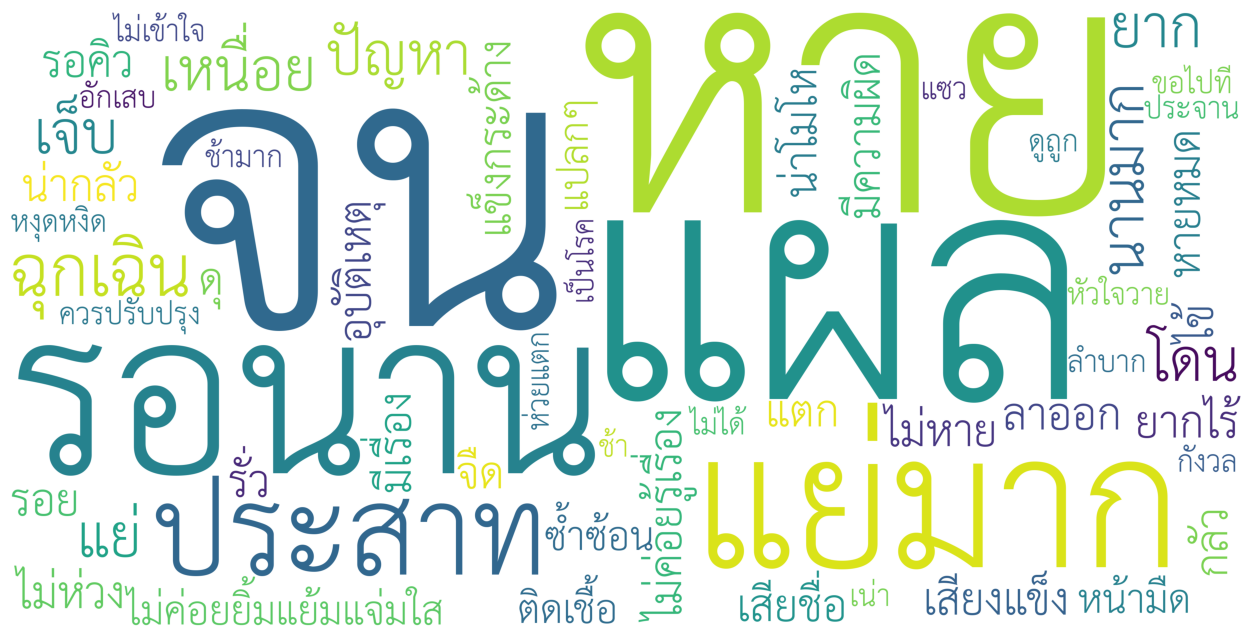

In [ ]:
regexp=r"[ก-๙a-zA-Z']+"  
fp = 'thsarabunnew-webfont.ttf'  

senti_neg = filtered_sentiword_neg[filtered_sentiword_neg['sentipolars'] == 'negative']     
keywords = " ".join(text for text in filtered_sentiword_neg['keywords']) 

wordcloud = WordCloud(background_color = 'white',font_path=fp,max_words=2000, height = 2000, width=4000, regexp=r"[ก-๙a-zA-Z']+") 
wordcloud.generate(keywords)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
count_word_neg = senti_neg.keywords.str.split(expand=True).stack().value_counts().reset_index()
count_word_neg.columns = ['keywords', 'frequency'] 
count_word_neg.head(10)

,keywords,frequency
0,จน,6
1,หาย,5
2,แผล,4
3,ฉุกเฉิน,3
4,ประสาท,3
5,รอนาน,3
6,แย่มาก,3
7,แย่,2
8,นานมาก,2
9,ยาก,2


In [ ]:
#filter sentipolars: positive
filtered_sentiword_pos = filtered_sentiword[filtered_sentiword['sentipolars'].str.contains("positive")]
filtered_sentiword_pos

,Index,intents,sentipolars,keywords,score,comment1,clean
0,0,sentiment,positive,เป็นกันเอง,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
0,0,sentiment,positive,ดูแล,5.0,เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต...,เคยได้ไปลองใช้บริการคลินิกนอกเวลาของรามาเมื่อต...
2,2,sentiment,positive,รัก,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
2,2,sentiment,positive,ไม่เจ็บ,5.0,การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ,การรักศึกษาของคุณหมอไม่เจ็บเลยค่ะ
5,5,sentiment,positive,รัก,5.0,ค่ารักรักษาพยนบาลไม่แพงด้วย,ค่ารักรักษาพันบาลไม่แพงด้วย
...,...,...,...,...,...,...,...
259,259,sentiment,positive,ดูแลรักษา,5.0,ให้การดูแลรักษาเป็นอย่างดี,ให้การดูแลรักษาเป็นอย่างดี
259,259,sentiment,positive,เป็นอย่างดี,5.0,ให้การดูแลรักษาเป็นอย่างดี,ให้การดูแลรักษาเป็นอย่างดี
260,260,sentiment,positive,ไมตรี,5.0,คำพูดคำจา อัธยาศัยไมตรี,คำพูดคำจาอัธยาศัยไมตรี
266,266,sentiment,positive,แข็งแรง,5.0,แข็งแรง และเล่าให้ทุกคนฟังเสมอว่า หมอ พยาบาลท่...,แข็งแรงและเล่าให้ทุกคนังเสมอว่าหมอพยาบาลที่ดี


In [ ]:
#filter keywords positive values: Positive 157 words
filtered_sentiword_pos['keywords'].values

array(['เป็นกันเอง', ' ดูแล', 'รัก', ' ไม่เจ็บ', 'รัก', ' ไม่แพง',
       'พรีเมียม', 'รวดเร็ว', 'ไม่ได้แพงเกินไป', ' ดูแลเอาใจใส่', ' ดี',
       'ชัดเจน', ' เข้าใจ', ' ไม่ได้หูตึง', ' น่ารัก', ' น่ารัก',
       'พรีเมียม', ' ดี', ' สุภาพ', 'เชื่อมั่น', 'พรีเมียม', 'ทันสมัย',
       'ดูแล', 'เป็นห่วง', ' เข้าใจ', 'สะอาด', ' กว้างขวาง', ' ดี',
       'พูดจาดี', ' น่ารัก', 'ไม่นานมาก', 'รวดเร็ว', ' ไม่เสียเวลา',
       'ให้บริการดี', ' คุ้มค่า', 'ไม่แพง', ' การบริการดี', 'สะอาด',
       'อร่อย', 'มีความสุข', 'พอดี', ' พอดี', 'ทันสมัย', 'ไม่เจ็บ',
       'สะอาด', 'ทันสมัย', 'รวดเร็ว', 'สะดวก', 'ขอบคุณ', 'คิดถึง',
       'เยี่ยม', 'เก่ง', 'ระดับดี', 'เป็นที่ยอมรับ', 'ไม่ใช่อุบัติเหตุ',
       'พอดี', ' ดี', 'ดี', 'ดูแล', ' ดี', 'ให้บริการดี', 'เอาใจใส่',
       ' ดี', 'ดูแลดี', 'พูดจาดี', 'เก่ง', 'ดูแล', ' เป็นอย่างดี',
       ' เป็นอย่างดี', 'ได้เยอะ', 'ดี', 'ดูแล', 'ยิ้มแย้มแจ่มใส',
       ' ใส่ใจ', ' ดูแล', ' อย่างดี', 'ดูแล', ' เต็มใจ', ' รอยยิ้ม',
       'เต็มใจ', ' ไม่ทอดทิ้ง', 'ทัน

In [ ]:
pos= filtered_sentiword_pos[['keywords']]
pos

,keywords
0,เป็นกันเอง
0,ดูแล
2,รัก
2,ไม่เจ็บ
5,รัก
...,...
259,ดูแลรักษา
259,เป็นอย่างดี
260,ไมตรี
266,แข็งแรง


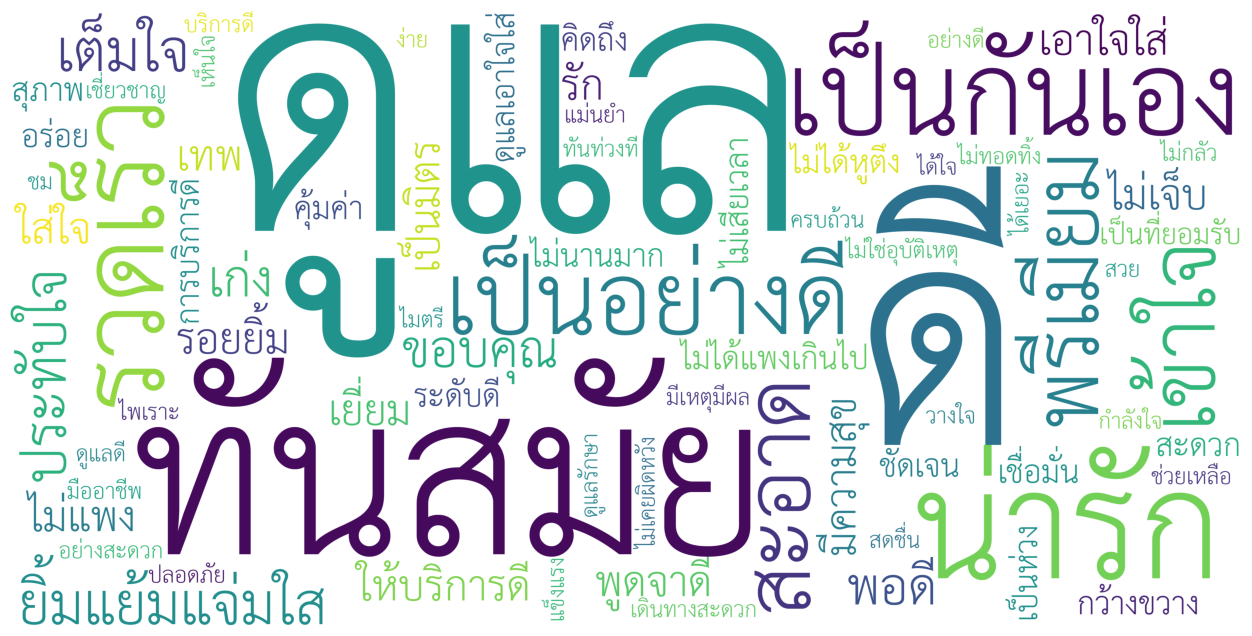

In [ ]:
senti_pos = filtered_sentiword_pos[filtered_sentiword_pos['sentipolars'] == 'positive']
keywords = " ".join(text for text in filtered_sentiword_pos['keywords']) 

wordcloud = WordCloud(background_color = 'white',font_path=fp,max_words=2000, height = 2000, width=4000, regexp=r"[ก-๙a-zA-Z']+") 
wordcloud.generate(keywords)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
count_word_pos = senti_pos.keywords.str.split(expand=True).stack().value_counts().reset_index()
count_word_pos.columns = ['keywords', 'frequency'] 
count_word_pos.head(10)

,keywords,frequency
0,ดูแล,15
1,ดี,10
2,ทันสมัย,7
3,น่ารัก,6
4,เป็นกันเอง,5
5,เป็นอย่างดี,5
6,รวดเร็ว,5
7,สะอาด,4
8,ยิ้มแย้มแจ่มใส,4
9,เข้าใจ,4
